/Users/danielmendonca/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


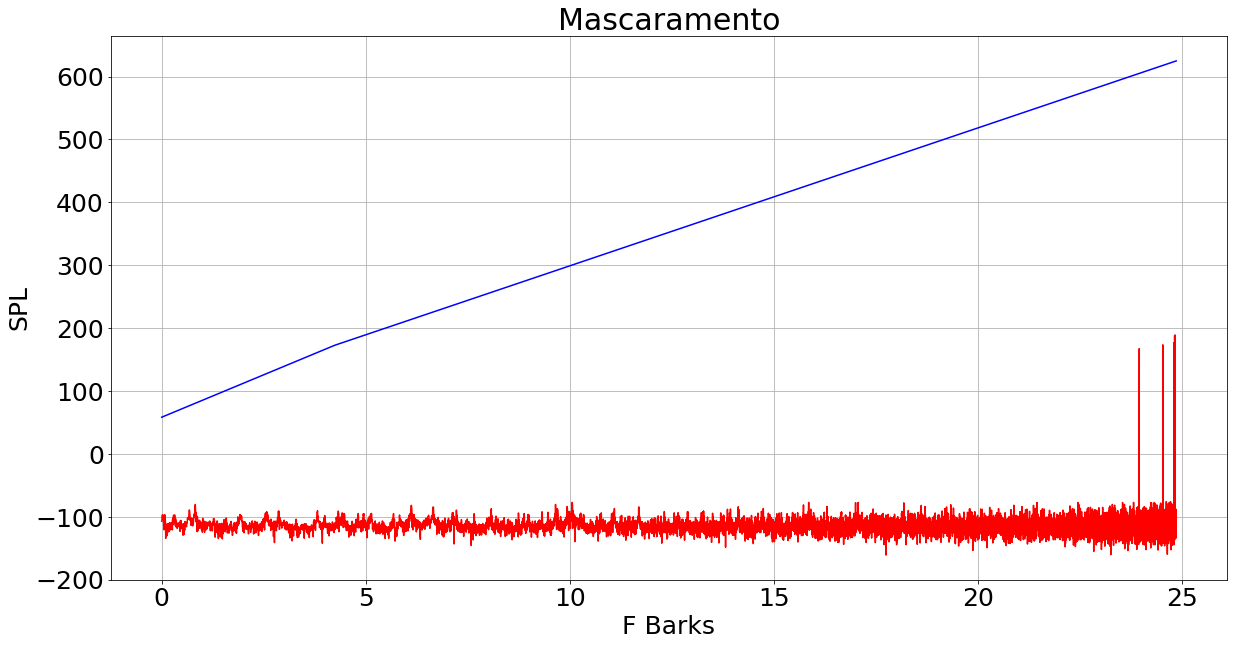

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
#Paramentros
A_0 = 0.6
A_1 = 0.55
A_2 = 0.55
A_3 = 0.15
A_4 = 0.1
A_5 = 0.05
F_s = 48000
N = 2048
T = 1.0/ Fs
n = np.arange(2*Fs)
#Sinal
y = A_0*np.cos(2*np.pi*440*n/F_s) + A_1*np.cos(2*np.pi*554*n/F_s) + A_2*np.cos(2*np.pi*660*n/F_s) + A_3*np.cos(2*np.pi*880*n/F_s) + A_4*np.cos(2*np.pi*4400*n/F_s) + A_5*np.cos(2*np.pi*8800*n/F_s)

y_fft = fft(y)
L = 2*Fs

y_spl = list(10*np.log10(p**2/(0.00001**2)) for p in y_fft)#barks

f = Fs*np.arange(L/2)/L
picos, props = find_peaks(y_spl[:24000], distance = 100)

#Grafico: fft e seus picos
z = np.array(list(13*np.arctan(0.76*fi/1000) + 3.5*np.arctan((fi/7500)**2) for fi in f))
downshift = 17

plt.figure(figsize=(20,10))
maskingCurves = []
for picoMask in picos:
 SPLMask = y_spl[picoMask]
 FMask = z[picoMask]
 dz = z - FMask
 lm = SPLMask - downshift
 maskingCurve = spreadingFunc(dz, lm)
 maskingCurves.append(maskingCurve)
#encontrando o threashhold
maskedCurve = []
for i in range(len(maskingCurves[0])):
     v = [x[i] for x in maskingCurves]
     maskedCurve.append(max(v))
plt.figure(figsize=(20,10))
plt.plot(z,y_spl[F_s:],'red')
plt.plot(z, maskedCurve, 'blue')
plt.title('Mascaramento')
plt.xlabel("F Barks")
plt.ylabel("SPL")
plt.grid()
plt.show()

In [5]:
def hzToBark(hz):
 bark = 26.81 * hz/(1960 + hz) - 0.53
 bark = np.where(bark < 2, bark + 0.15*(2 - bark), bark)
 bark = np.where(bark < 20.1, bark + 0.22*(bark -20.1), bark)
 return bark

In [10]:
def barkToHz(bark):
 bark = np.where(bark < 2, (bark - 0.3)/0.85, bark)
 bark = np.where(bark > 20.1, (bark + 4.422)/1.22, bark)
 hz = 1960*(bark + 0.53)/(26.28 - bark)
#[Terhardt 79]

quietThreshhold = 3.64*(f/1000)**(-0.8)-6.5*np.exp(-0.6*((f/1000)-3.3)**2)+(f/1000)**4/1000


/Users/danielmendonca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


In [11]:
def spreadingFunc(dz, Lm):
    stepFuncDz = np.heaviside(dz, 1)
    F = (-27 + 0.37*max(Lm-40,0)*stepFuncDz) * np.abs(dz) + Lm
    return F

In [15]:
#z = list(13*np.arctan(0.76*f/1000) + 3.5*np.arctan((f/7500)**2) for f in xf)
def hzToBark(hz):
 bark = 26.81 * hz/(1960 + hz) - 0.53
 bark = np.where(bark < 2, bark + 0.15*(2 - bark), bark)
 bark = np.where(bark < 20.1, bark + 0.22*(bark -20.1), bark)
 return bark
z = hzToBark(y)

In [20]:
fbk

array([-4.60561   , -4.59851947, -4.59143255, ..., 24.25574637,
       24.25578536, 24.25582435])